In [1]:
import numpy as np
import scipy.io as sio
import sklearn.metrics as metrics
from skimage.feature import hog
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from fea_util import *

In [2]:
train_data, train_label, test_data, test_label = get_data()

In [3]:
#################################################################################
###################### step 1:      extract feature histograms   ################
#################################################################################

# set parameters for color histogram 
# number of quantization bins
nBins=16

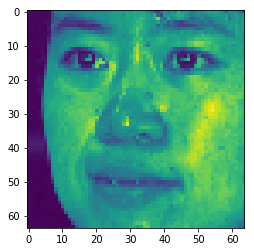

In [4]:
#plot some pictures to take a look
implot=plt.imshow(train_data[29])

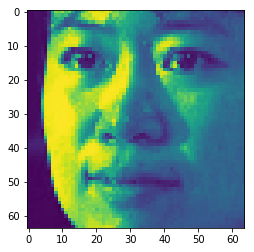

In [5]:
implot=plt.imshow(train_data[23])

In [8]:
##########PLACEHOLDER start ###############
# write a function get_intensity_feature() in fea_util.py that returns intensity histograms for both training data and testing data
from fea_util import *
train_intensity_feature, test_intensity_feature = get_intensity_feature(train_data, test_data, nBins)

In [12]:
print("Shape of train_intensity_feature is", len(train_intensity_feature), len(train_intensity_feature[0]))
print("Shape of test_intensity_feature is", len(test_intensity_feature), len(test_intensity_feature[0]))

Shape of train_intensity_feature is 10262 16
Shape of test_intensity_feature is 1292 16


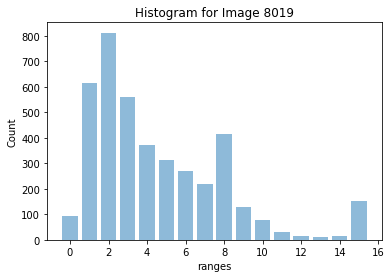

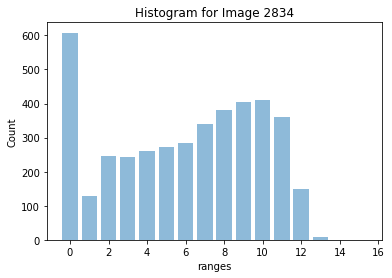

In [14]:
ranges=[i for i in range(16)]
idx=np.random.randint(0,len(train_intensity_feature))
plt.bar(ranges, train_intensity_feature[idx], align='center', alpha=0.5)
plt.ylabel('Count')
plt.xlabel('ranges')
plt.title('Histogram for Image {}'.format(idx))
plt.show()

ranges=[i for i in range(16)]
idx=np.random.randint(0,len(train_intensity_feature))
plt.bar(ranges, train_intensity_feature[idx], align='center', alpha=0.5)
plt.ylabel('Count')
plt.xlabel('ranges')
plt.title('Histogram for Image {}'.format(idx))
plt.show()

In [15]:
train_intensity_feature = np.array(train_intensity_feature)
test_intensity_feature = np.array(test_intensity_feature)
train_intensity_feature = train_intensity_feature.reshape(len(train_label), -1)
test_intensity_feature = test_intensity_feature.reshape(len(test_intensity_feature), -1)

In [18]:
print(train_intensity_feature)
print("#######################################")
print(test_intensity_feature)

[[ 522  427 1034 ...    0    0    0]
 [ 504  289  829 ...    0    0    0]
 [ 532  382 1006 ...    0    0    0]
 ...
 [  30  269  307 ...   89   48    2]
 [  76  769  581 ...    4    0    0]
 [ 211 1758  413 ...    1    0    0]]
#######################################
[[ 447   93  156 ...    0    0    0]
 [1540  412  351 ...    2    0    0]
 [ 404  127  112 ...   25    1    0]
 ...
 [ 188  786  473 ...    1    0    0]
 [ 142 1334  590 ...    0    1    0]
 [ 167  630  529 ...    1    0    0]]


## Creating a SVM classifier
+ N=16
+ N=64
+ N=128

In [22]:
from sklearn import svm
clf=svm.SVC()
clf.fit(train_intensity_feature, train_label)
print("Accuracy =", round(clf.score(test_intensity_feature, test_label),4))

predict_y=clf.predict(test_intensity_feature)

print(metrics.classification_report(test_label, predict_y))

Accuracy = 0.0673
             precision    recall  f1-score   support

          1       0.00      0.00      0.00        19
          2       0.00      0.00      0.00        19
          3       0.00      0.00      0.00        19
          4       0.00      0.00      0.00        19
          5       0.00      0.00      0.00        19
          6       0.00      0.00      0.00        19
          7       0.67      0.11      0.18        19
          8       0.00      0.00      0.00        19
          9       0.80      0.21      0.33        19
         10       1.00      0.05      0.10        19
         11       0.00      0.00      0.00        19
         12       0.00      0.00      0.00        19
         13       0.00      0.00      0.00        19
         14       0.00      0.00      0.00        19
         15       0.00      0.00      0.00        19
         16       0.00      0.00      0.00        19
         17       1.00      0.05      0.10        19
         18       0.60     

C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
print(predict_y[:50])

[19 24 19 19  3 24  3 59 19 19 24 20  3 19 55 19  3 59 19 19 68 19 24 59
 19 22 42 19 19 42 24 19 42 18 24 42 24 13 19 19 42 19 19 55 55 24 24 24
 68 24]


Shape of train_intensity_feature is 10262 64
Shape of test_intensity_feature is 1292 64


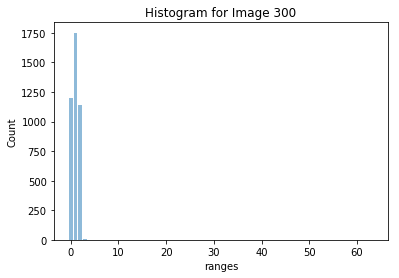

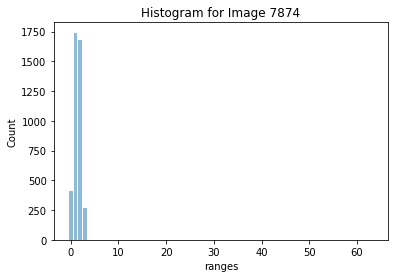

In [23]:
nBins=64
train_intensity_feature, test_intensity_feature = get_intensity_feature(train_data, test_data, nBins)
print("Shape of train_intensity_feature is", len(train_intensity_feature), len(train_intensity_feature[0]))
print("Shape of test_intensity_feature is", len(test_intensity_feature), len(test_intensity_feature[0]))

ranges=[i for i in range(nBins)]
idx=np.random.randint(0,len(train_intensity_feature))
plt.bar(ranges, train_intensity_feature[idx], align='center', alpha=0.5)
plt.ylabel('Count')
plt.xlabel('ranges')
plt.title('Histogram for Image {}'.format(idx))
plt.show()

ranges=[i for i in range(nBins)]
idx=np.random.randint(0,len(train_intensity_feature))
plt.bar(ranges, train_intensity_feature[idx], align='center', alpha=0.5)
plt.ylabel('Count')
plt.xlabel('ranges')
plt.title('Histogram for Image {}'.format(idx))
plt.show()

In [24]:
train_intensity_feature = np.array(train_intensity_feature)
test_intensity_feature = np.array(test_intensity_feature)
train_intensity_feature = train_intensity_feature.reshape(len(train_label), -1)
test_intensity_feature = test_intensity_feature.reshape(len(test_intensity_feature), -1)

print(train_intensity_feature)
print("#######################################")
print(test_intensity_feature)

[[3428  667    1 ...    0    0    0]
 [3202  894    0 ...    0    0    0]
 [3531  565    0 ...    0    0    0]
 ...
 [ 894 1759 1135 ...    0    0    0]
 [1883 1335  859 ...    0    0    0]
 [2785 1279   30 ...    0    0    0]]
#######################################
[[1040 2543  510 ...    0    0    0]
 [2605 1157  331 ...    0    0    0]
 [ 865 1998 1133 ...    0    0    0]
 ...
 [2038 1887  170 ...    0    0    0]
 [2424 1563  107 ...    0    0    0]
 [1939 2040  116 ...    0    0    0]]


In [27]:
from sklearn import svm
clf=svm.SVC()
clf.fit(train_intensity_feature, train_label)
print("Accuracy =", round(clf.score(test_intensity_feature, test_label),4))

predict_y=clf.predict(test_intensity_feature)

print(metrics.classification_report(test_label, predict_y))

Accuracy = 0.0379
             precision    recall  f1-score   support

          1       0.20      0.05      0.08        19
          2       0.06      0.05      0.06        19
          3       0.00      0.00      0.00        19
          4       0.00      0.00      0.00        19
          5       0.00      0.00      0.00        19
          6       0.09      0.05      0.07        19
          7       0.09      0.05      0.07        19
          8       0.14      0.05      0.08        19
          9       0.18      0.11      0.13        19
         10       0.15      0.16      0.15        19
         11       0.00      0.00      0.00        19
         12       0.00      0.00      0.00        19
         13       0.00      0.00      0.00        19
         14       0.00      0.00      0.00        19
         15       0.00      0.00      0.00        19
         16       0.33      0.05      0.09        19
         17       0.00      0.00      0.00        19
         18       0.00     

C:\Users\sananand\AppData\Local\Continuum\miniconda3\envs\tensorflowpy36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
